Model Accuracy: 0.9569
Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.93      0.95      1688
        Real       0.94      0.98      0.96      1792

    accuracy                           0.96      3480
   macro avg       0.96      0.96      0.96      3480
weighted avg       0.96      0.96      0.96      3480



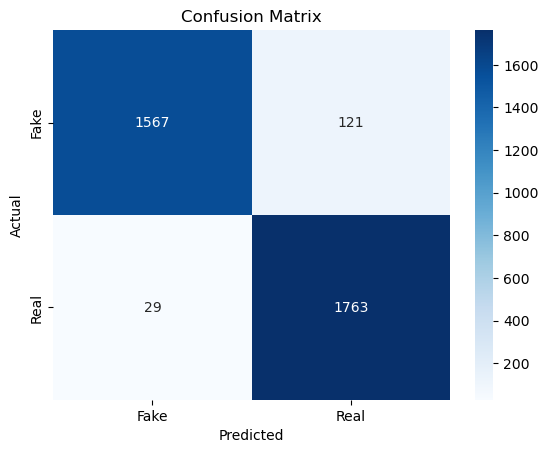

['fake_news_classifier.pkl']

In [6]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# Use filedialog to select the cleaned data file
input_file_path = filedialog.askopenfilename(title="Select the cleaned data file", filetypes=[("Excel Files", "*.xlsx")])

# Load the cleaned dataset
data = pd.read_excel(input_file_path)

# Prepare the data for training and testing
X = data['text']  # Text content of articles
y = data['Label']  # Real or Fake labels

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an NLP pipeline with TF-IDF Vectorizer and Naive Bayes classifier
# This pipeline will automatically vectorize the text and train the model
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

import joblib
joblib.dump(model, "fake_news_classifier.pkl")